# 1. Introduction
---

## 1.1 Problem Statement

Property investment is one of large sector in Thailand....

## 1.2 Data Dictionary

# 2. Functions Preparation
---

## 2.1 Libraries Importation

In [1]:
# Import libraries

# General libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Model


## 2.2 In-notebook Functions Creation

# 3. Data Preparation
---

## 3.1 Data Consolidation

In [2]:
df = pd.DataFrame()

# Set relative path for raw data folder
relative_path = ".\selenium\scrape_data"

# Get file names in folder as a list
file_names = os.listdir(relative_path)

# Iterate raw csv files in folder
for file_name in file_names:
    try: 
        temp_df = pd.read_csv(f"{relative_path}\\{file_name}")
        df = pd.concat([df, temp_df])
    except:
        # Print error file name
        print(file_name)

## 3.2 Data Cleansing

### 3.2.1 Duplication Removal

In [3]:
# Check data shape
# There are 1020 rows and 21 features from raw datas
df.shape

(1020, 21)

In [4]:
# Check duplicate data
# Dataset contains 8 duplicate rows, we can drop it.
df.duplicated().sum()

8

In [5]:
# Drop duplicate rows and check result
df.drop_duplicates(inplace=True)
df.shape

(1012, 21)

### 3.2.2 Features Preparation
From scraping process, some features were collected as list of features due to uncertainty of the features occurrence that make .csv unable to store it in one column. 
<br>In-order-that, a list of features were joined by `|` to be a single string.

For example, column `internal_feature_keys` and `internal_feature_values` contain information of `number of bedrooms`, `number of bathrooms`, and `internal area` together as
<br>`bedrooms|bathrooms|internal area`.

**Hence, this section is to split the joined features to be ready for analyzing.**

In [6]:
df.head(2)

,dev,address,district,sale_price,rent_price,internal_feature_keys,internal_feature_values,external_feature_keys,exteranal_feature_values,description,...,amenity_keys,amenity_values,neighbor_cats,neighbor_names,neighbor_distances,asking_price,asking_price_change_quater,asking_price_change_year,gross_rental_yield,rental_price_change_year
0,H Sukhumvit 43,"Soi Phrom Mit, Khlong Toei Nuea, Vadhana, Bang...",Watthana,12000000.0,57000.0,Bedrooms|Bathrooms|Internal area,2|2|59,Floors|Towers|Project Area|Year built,"32|1|3,080 m2|2014",PropertyScout ID 954486\nCheck all listing det...,...,Elevator|Parking|24-hours Security|CCTV|Swimmi...,True|True|True|True|True|True|True|False|False...,marker marker-bts|marker marker-bts|marker mar...,Phrom Phong|Thong Lo|Sukhumvit|Asok 4 Toll Pla...,830 m / 10 minutes by foot|1.5 km / 8 minutes ...,"195,125",0.0,0.74,4.67,-6.06
1,A Space I.D. Asoke - Ratchada,"Thanon Din Daeng, Din Daeng, Bangkok 10400",Ratchathewi,4639200.0,15000.0,Bedrooms|Bathrooms|Internal area,1|1|33,Floors|Towers|Year built,30|1|2016,PropertyScout ID 954280\nCheck all listing det...,...,Elevator|Parking|24-hours Security|CCTV|Swimmi...,True|True|True|True|True|True|True|True|False|...,marker marker-mrt|marker marker-mrt|marker mar...,Phraram Kao 9|Phra Ram 9|Asok 2 Toll Plaza|Aso...,710 m / 9 minutes by foot|740 m / 9 minutes by...,"126,979",0.0,11.06,4.16,4.51


In [7]:
# def split funciton
def split_feature(string):
    try:
        return string.split("|")
    except:
        return None

In [8]:
# List of joined feature column names
joined_features = ['internal_feature_keys', 'internal_feature_values', 'external_feature_keys', 'exteranal_feature_values',
                  'amenity_keys', 'amenity_values', 'neighbor_cats', 'neighbor_names', 'neighbor_distances']

# Iterate column names to create list
for feature in joined_features:
    df[feature] = df[feature].apply(split_feature)

In [9]:
# Check result
df.head(2)

,dev,address,district,sale_price,rent_price,internal_feature_keys,internal_feature_values,external_feature_keys,exteranal_feature_values,description,...,amenity_keys,amenity_values,neighbor_cats,neighbor_names,neighbor_distances,asking_price,asking_price_change_quater,asking_price_change_year,gross_rental_yield,rental_price_change_year
0,H Sukhumvit 43,"Soi Phrom Mit, Khlong Toei Nuea, Vadhana, Bang...",Watthana,12000000.0,57000.0,"[Bedrooms, Bathrooms, Internal area]","[2, 2, 59]","[Floors, Towers, Project Area, Year built]","[32, 1, 3,080 m2, 2014]",PropertyScout ID 954486\nCheck all listing det...,...,"[Elevator, Parking, 24-hours Security, CCTV, S...","[True, True, True, True, True, True, True, Fal...","[marker marker-bts, marker marker-bts, marker ...","[Phrom Phong, Thong Lo, Sukhumvit, Asok 4 Toll...","[830 m / 10 minutes by foot, 1.5 km / 8 minute...","195,125",0.0,0.74,4.67,-6.06
1,A Space I.D. Asoke - Ratchada,"Thanon Din Daeng, Din Daeng, Bangkok 10400",Ratchathewi,4639200.0,15000.0,"[Bedrooms, Bathrooms, Internal area]","[1, 1, 33]","[Floors, Towers, Year built]","[30, 1, 2016]",PropertyScout ID 954280\nCheck all listing det...,...,"[Elevator, Parking, 24-hours Security, CCTV, S...","[True, True, True, True, True, True, True, Tru...","[marker marker-mrt, marker marker-mrt, marker ...","[Phraram Kao 9, Phra Ram 9, Asok 2 Toll Plaza,...","[710 m / 9 minutes by foot, 740 m / 9 minutes ...","126,979",0.0,11.06,4.16,4.51


In [10]:
def restructure_feature(keyword, keys_series, values_series):
    """ Return value in values_list of given keyword that matched keys_list"""
    result_list = []
    for i in range(len(keys_series)):
        try:
            result_list.append(list(values_series)[i][list(keys_series)[i].index(keyword)])
        except:
            result_list.append(None)
    return result_list

In [11]:
# Restructure list to columns
# Internal features
df['bedrooms'] = restructure_feature('Bedrooms', df['internal_feature_keys'], df['internal_feature_values'])
df['bathrooms'] = restructure_feature('Bathrooms', df['internal_feature_keys'], df['internal_feature_values'])
df['internal_area'] = restructure_feature('Internal area', df['internal_feature_keys'], df['internal_feature_values'])

In [12]:
# Restructure list to columns
# External features
df['floors'] = restructure_feature('Floors', df['external_feature_keys'], df['exteranal_feature_values'])
df['towers'] = restructure_feature('Towers', df['external_feature_keys'], df['exteranal_feature_values'])
df['project_area'] = restructure_feature('Project Area', df['external_feature_keys'], df['exteranal_feature_values'])
df['year_built'] = restructure_feature('Year built', df['external_feature_keys'], df['exteranal_feature_values'])

In [13]:
# Restructure list to columns
# Amenities
df['has_elevator'] = restructure_feature('Elevator', df['amenity_keys'], df['amenity_values'])
df['has_parking'] = restructure_feature('Parking', df['amenity_keys'], df['amenity_values'])
df['has_security'] = restructure_feature('24-hours Security', df['amenity_keys'], df['amenity_values'])
df['has_cctv'] = restructure_feature('CCTV', df['amenity_keys'], df['amenity_values'])
df['has_pool'] = restructure_feature('Swimming Pool', df['amenity_keys'], df['amenity_values'])
df['has_sauna'] = restructure_feature('Sauna', df['amenity_keys'], df['amenity_values'])
df['has_gym'] = restructure_feature('Gym', df['amenity_keys'], df['amenity_values'])
df['has_garden_bbq'] = restructure_feature('Garden / BBQ', df['amenity_keys'], df['amenity_values'])
df['has_playground'] = restructure_feature("Playground / Kid's Area", df['amenity_keys'], df['amenity_values'])
df['has_shop_on_premise'] = restructure_feature('Shop on Premise', df['amenity_keys'], df['amenity_values'])
df['has_restaurant_on_premise'] = restructure_feature('Restaurant on Premise', df['amenity_keys'], df['amenity_values'])
df['has_wifi'] = restructure_feature('Wi-Fi', df['amenity_keys'], df['amenity_values'])

In [14]:
# Restructure list to columns
# neighborhood
df[['neighbor_cats', 'neighbor_names', 'neighbor_distances']]

,neighbor_cats,neighbor_names,neighbor_distances
0,"[marker marker-bts, marker marker-bts, marker ...","[Phrom Phong, Thong Lo, Sukhumvit, Asok 4 Toll...","[830 m / 10 minutes by foot, 1.5 km / 8 minute..."
1,"[marker marker-mrt, marker marker-mrt, marker ...","[Phraram Kao 9, Phra Ram 9, Asok 2 Toll Plaza,...","[710 m / 9 minutes by foot, 740 m / 9 minutes ..."
2,"[marker marker-bts, marker marker-mrt, marker ...","[Phrom Phong, Queen Sirikit National Conventio...","[1.4 km / 7 minutes by car, 1.7 km / 8 minutes..."
3,None,None,None
4,"[marker marker-bts, marker marker-bts, marker ...","[Phra Khanong, On Nut, Phra Khanong Toll Plaza...","[880 m / 4 minutes by car, 1.2 km / 12 minutes..."
...,...,...,...
25,"[marker marker-bts, marker marker-bts, marker ...","[Thong Lo, Phrom Phong, Ekkamai, At Narong Tol...","[280 m / 4 minutes by foot, 1.1 km / 7 minutes..."
26,"[marker marker-mrt, marker marker-expressway, ...","[Phetchaburi, Asok 2 Toll Plaza, Asok 4 Toll P...","[220 m / 3 minutes by foot, 800 m / 2 minutes ..."
27,"[marker marker-bts, marker marker-mrt, marker ...","[Asok, Sukhumvit, Phrom Phong, Sukhumvit Toll ...","[630 m / 9 minutes by foot, 750 m / 10 minutes..."
28,"[marker marker-bts, marker marker-bts, marker ...","[Phrom Phong, Asok, Sukhumvit, Asok 3 Toll Pla...","[660 m / 8 minutes by foot, 1.2 km / 9 minutes..."


**Neighborhood features have to be done more additional steps to split list to be columns.** 
<br>These features are about the top 6 nerest transportation facilities, which including city train(BTS and MRT), express way.
These features were captured by iteration of algorithm that made a length of list for each row 

Challenges:
1. Differece in number of value in list: 0 to 6
2. Differece in order of value in categorical list
3. Difference in type of facility
4. Difference in unit of measurement: meters, kilometers

**To simplify these features' situation, features will be cosidered as two types:**
1. Nearest distance between condominium and tranportation facilities
    - City train
    - Express way
2. Boolean features wheater condominium is closer than 1 km. to transportation facilities
    - City train
    - Express way

In [15]:
# define function that returns closet distance to transportation facilities

def distance_str_to_float(string):
    """Covert string distance to float and covert to meter"""
    if len(string) > 0:
        trim_str = string.split('/')[0].strip()
        if trim_str[-2:] == 'km':
            return float(trim_str[:-3]) * 1000
        elif trim_str[-1] == 'm':
            return float(trim_str[:-2])
    else:
        return None

def get_distance_citytrain(category_list, distance_list):
    """Fuction use with dataframe .apply or .map
    Return: distance of closest city train in meter unit"""
    if (category_list != None):
        if ('marker marker-bts' in category_list) or ('marker marker-mrt' in category_list):
            convert_distance_list = []
            # Iterate all value in list to find city train distances
            for i in range(len(category_list)):
                if category_list[i] in ['marker marker-bts', 'marker marker-mrt']:
                    # Convert string to distance
                    convert_distance = distance_str_to_float(distance_list[i])
                    # Append all bts/mrt distances
                    if convert_distance != None:
                        convert_distance_list.append(convert_distance)
            # return closest distance
            convert_distance_list.sort()
            return convert_distance_list[0]
    return None

def get_distance_expressway(category_list, distance_list):
    """Fuction use with dataframe .apply or .map
    Return: distance of closest express way in meter unit"""
    if (category_list != None):
        if ('marker marker-expressway' in category_list):
            convert_distance_list = []
            # Iterate all value in list to find city train distances
            for i in range(len(category_list)):
                if category_list[i] in ['marker marker-expressway']:
                    # Convert string to distance
                    convert_distance = distance_str_to_float(distance_list[i])
                    # Append all bts/mrt distances
                    if convert_distance != None:
                        convert_distance_list.append(convert_distance)
            # return closest distance
            convert_distance_list.sort()
            try:
                return convert_distance_list[0]
            except:
                return None
    return None

In [33]:
df[['express_way_distance', 'close_express_way']]

,express_way_distance,close_express_way
0,3600.0,0
1,910.0,1
2,1900.0,0
3,NaN,0
4,1700.0,0
...,...,...
25,2800.0,0
26,800.0,1
27,1900.0,0
28,2800.0,0


In [16]:
# Create transport facility distance columns
df['city_train_distance'] = df[['neighbor_cats', 'neighbor_distances']].apply(lambda x: get_distance_citytrain(x[0], x[1]), axis=1)
df['express_way_distance'] = df[['neighbor_cats', 'neighbor_distances']].apply(lambda x: get_distance_expressway(x[0], x[1]), axis=1)

# Create boolean columns if distance <= 1 km.
df['close_city_train'] = df['city_train_distance'].apply(lambda x: int(x <= 1000) if x != None else 0)
df['close_express_way'] = df['express_way_distance'].apply(lambda x: int(x <= 1000) if x != None else 0)

In [17]:
# Drop unused columns
df.drop(columns=joined_features, inplace=True)

In [18]:
df.head()

,dev,address,district,sale_price,rent_price,description,detail,asking_price,asking_price_change_quater,asking_price_change_year,...,has_gym,has_garden_bbq,has_playground,has_shop_on_premise,has_restaurant_on_premise,has_wifi,city_train_distance,express_way_distance,close_city_train,close_express_way
0,H Sukhumvit 43,"Soi Phrom Mit, Khlong Toei Nuea, Vadhana, Bang...",Watthana,12000000.0,57000.0,PropertyScout ID 954486\nCheck all listing det...,"Fully furnished 2 bedrooms, 2 bathrooms condom...","195,125",0.0,0.74,...,True,False,False,False,False,True,830.0,3600.0,1,0
1,A Space I.D. Asoke - Ratchada,"Thanon Din Daeng, Din Daeng, Bangkok 10400",Ratchathewi,4639200.0,15000.0,PropertyScout ID 954280\nCheck all listing det...,"Fully Fitted 1 bedroom, 1 bathroom condo for s...","126,979",0.0,11.06,...,True,True,False,False,False,True,710.0,910.0,1,1
2,Aguston Sukhumvit 22,"150/1 สุขุมวิท Khwaeng Khlong Toei, Khet Khlon...",Khlong Toei,15000000.0,NaN,PropertyScout ID 923172\nCheck all listing det...,"Modern 2-bedroom 2-bathroom Condo unit, sized ...","151,925",0.0,-4.70,...,True,True,True,False,False,True,1400.0,1900.0,0,0
3,KHUN by YOO inspired by Starck,"139 Soi Sukhumvit 55, Khwaeng Khlong Tan Nuea,...",Watthana,25000000.0,65000.0,PropertyScout ID 923585\nCheck all listing det...,"Modern 1-bedroom 1-bathroom Condo unit, sized ...","428,041",0.0,-11.55,...,True,True,True,True,True,True,NaN,NaN,0,0
4,Aspire Sukhumvit 48,"Soi Piya Watchara, Phra Khanong, Khlong Toei, ...",Khlong Toei,4500000.0,20000.0,PropertyScout ID 513916\nCheck all listing det...,"Fully furnished 2 bedrooms, 2 bathrooms condo ...","97,051",0.0,-7.54,...,True,False,False,False,False,True,880.0,1700.0,1,0


### 3.2.3 Missing Values and Data Types Check

In [19]:
# Check missing values
missing_df = pd.DataFrame({'n_missing': df.isnull().sum().sort_values(ascending=False)})
missing_df['pct_missing'] = round(missing_df['n_missing'] / len(df) * 100, 2)
missing_df[missing_df['n_missing'] > 0]

,n_missing,pct_missing
rent_price,875,86.46
project_area,430,42.49
year_built,154,15.22
has_playground,110,10.87
has_restaurant_on_premise,106,10.47
has_wifi,105,10.38
has_shop_on_premise,104,10.28
has_garden_bbq,98,9.68
has_sauna,97,9.58
has_elevator,86,8.50


**According to missing value table, missing values can be separated to 4 groups by number of missing and approach to fix them.**
1. **High percentage of missig data:**
    - Approch: Drop whole columns
    - `rent_price` : 86.46% missing
    - `project_area` : 42.49% missing
2. **Boolean columns (all amenity features):**
    - Approch: Treat missing data as 0 since absences of objects that unable to scrape could imply that condominiums do not have these fuctions.
3. **Columns that missing percentage less than or equal to 15%:**
    - `year_built` which has 15% of missing also considered
    - 2 approaches could be applied:
        - Drop missing rows
        - Impute median values
4.**Columns that do not need to fix:** Sice they are additional detail of codominiums.
    - `dev`
    - `address`
    - `detail`
    - `description`

In [20]:
# 1. Drop columns
df.drop(columns=['rent_price', 'project_area'], inplace=True)

In [21]:
# 2. Fill null with zero for boolean features
amenity_columns = df.columns[df.columns.str.contains('has')]
df[amenity_columns] = df[amenity_columns].fillna(value=0)

In [22]:
# 3. Columns that missing percentage less than or equal to 15%

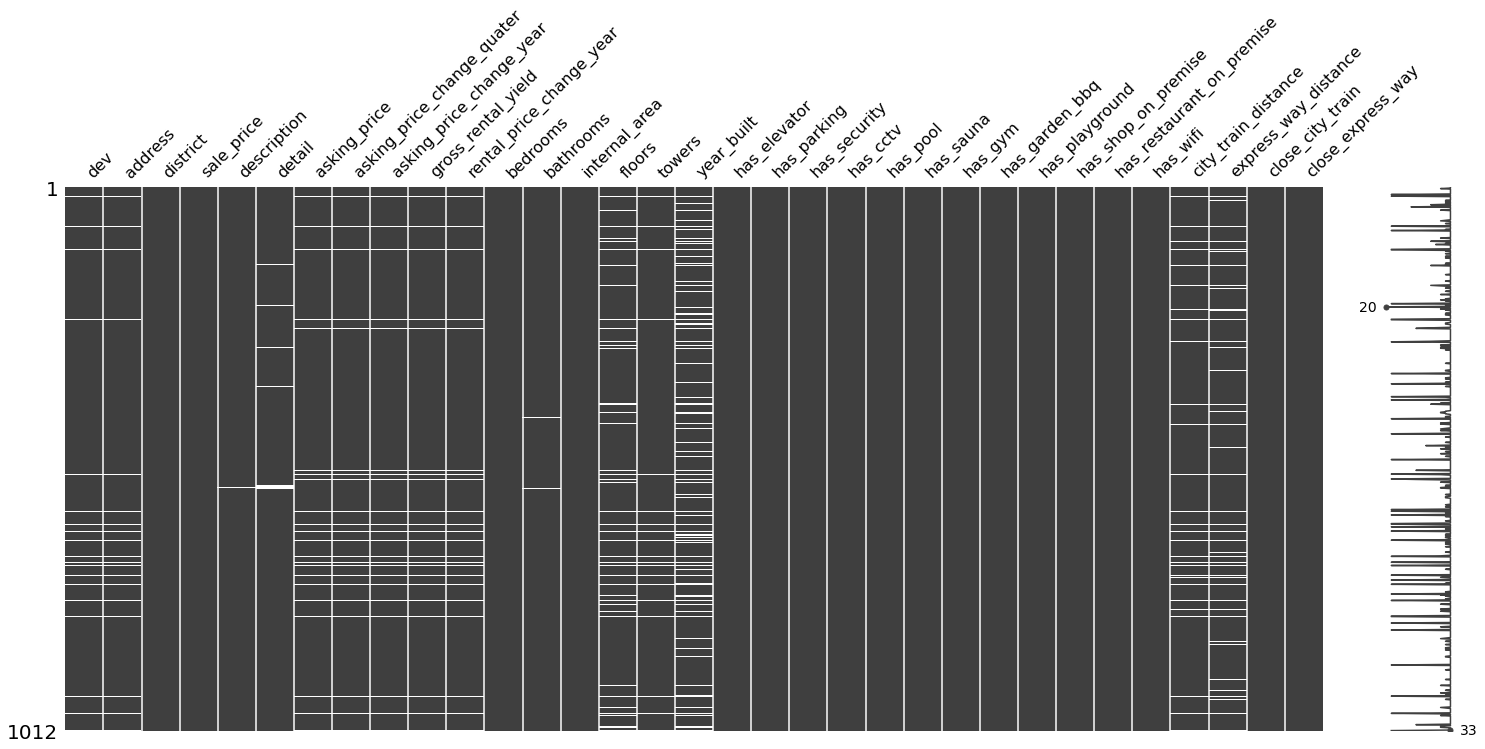

In [26]:
# Check missing values by missingno library to see patern and effect on missing data
msno.matrix(df);

**From missingno matrix**, data are likely to be missing on the same rows, which could imply that if we drop row that contain null, data will be missing about 15% based on maxmimum percentage of missing values.

In [36]:
# Check if we drop rows that contain missing value
len_df = df.shape[0]
len_drop_df = df.drop(columns=['dev', 'address', 'description', 'detail']).dropna().shape[0]
print(f"Original rows: {len_df}")
print(f"Drop null rows: {len_drop_df}")
print(f"Row loss: {len_df - len_drop_df}")
print(f"%Loss: {round((len_df - len_drop_df) / len_df * 100, 2)}")

Original rows: 1012
Drop null rows: 831
Row loss: 181
%Loss: 17.89


**If we drop null values**, data will be decreased 181 rows, which are 17.89% of original rows, and will be 831 rows totally.
<br>831 data are still accepctable for regression problem but we can also try to impute data.
<br> We will pause fixing missing values for a moment and cotinue again when we're doing model after train test spliting to avoid data leakage.


In [28]:
# Check missing values
missing_df = pd.DataFrame({'n_missing': df.isnull().sum().sort_values(ascending=False)})
missing_df['pct_missing'] = round(missing_df['n_missing'] / len(df) * 100, 2)
missing_df[missing_df['n_missing'] > 0]

,n_missing,pct_missing
year_built,154,15.22
floors,83,8.20
express_way_distance,75,7.41
city_train_distance,59,5.83
asking_price,50,4.94
asking_price_change_quater,50,4.94
asking_price_change_year,50,4.94
gross_rental_yield,50,4.94
rental_price_change_year,50,4.94
address,44,4.35


### 3.2.4 Data Type Check
Data were scraped as text without any transforming before saving to .csv, therefore we need to turn numeric features to be appropriate form.

In [29]:
df.dtypes

dev                            object
address                        object
district                       object
sale_price                    float64
description                    object
detail                         object
asking_price                   object
asking_price_change_quater    float64
asking_price_change_year      float64
gross_rental_yield            float64
rental_price_change_year       object
bedrooms                       object
bathrooms                      object
internal_area                  object
floors                         object
towers                         object
year_built                     object
has_elevator                   object
has_parking                    object
has_security                   object
has_cctv                       object
has_pool                       object
has_sauna                      object
has_gym                        object
has_garden_bbq                 object
has_playground                 object
has_shop_on_

In [30]:
# # Cast features to be float
# str_to_float_columns = ['asking_price', 'rental_price_change_year', 'internal_area']

# # Remove ',' in values
# for col in str_to_float_columns:
#     df[col] = df[col].str.replace(',', '')



# # df[str_to_float_columns].astype(float)

In [31]:
df['rental_price_change_year']

0     -6.06
1      4.51
2      0.17
3      -1.4
4      8.58
      ...  
25    -6.54
26     5.99
27    -3.92
28    33.68
29      NaN
Name: rental_price_change_year, Length: 1012, dtype: object

In [37]:
df['asking_price'].astype(float)

ValueError: could not convert string to float: '195,125'

# 4. EDA
---

# 5. Modeling and Evaluation
---

# 6. Additional Section
---

# 7. Summarization
---